In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import chess
import numpy as np
import shelve
import os
from IPython.display import display, HTML, clear_output
import time
import collections

In [3]:
from endgames_helper import get_rook_start, get_two_bishops_start, get_pawn_start

In [4]:
def get_state_from_board(board):
    state = ' '.join(board.fen().split(' ')[:2])
    return state

def get_next_state(board, move):
    board.push(move)
    state = ' '.join(board.fen().split(' ')[:2])
    status = int(board.is_checkmate())
    board.pop()
    return state, -status

In [5]:
def bfs(board, folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    states = shelve.open(folder+'/states', flag='n', writeback=True) 
    
    state = get_state_from_board(board)
    seen = set([])

    queue = collections.deque([state])
    board = chess.Board()
    while queue:
        state = queue.popleft()
        board.clear()
        fen = state + ' - - 0 1'
        board.set_fen(fen)
        if not board.is_game_over():
#             clear_output(wait=True)
#             display(board)
#             time.sleep(1)
            states[state] = {}
            for move in board.legal_moves:
                action = str(move)
                states[state][action] = {}
                next_state, status = get_next_state(board, move)
                states[state][action]['status'] = status
                states[state][action]['next_state'] = next_state
                if next_state not in seen:
                    seen.add(next_state)
                    queue.append(next_state)
        N = len(states)
        if N%10000 == 0:
            print('\rstates: {}'.format(N), end='')
            states.sync()
    print()
    states.close()
    return states

# Rook

In [7]:
# states: 398780
# CPU times: user 4min 23s, sys: 6.63 s, total: 4min 30s
# Wall time: 4min 31s
board = get_rook_start()
%time _ = bfs(board, './data/rook_states_tree')

states: 390000
CPU times: user 4min 23s, sys: 6.63 s, total: 4min 30s
Wall time: 4min 31s


### Difference from scanning all posible (Notebook 01)

In [71]:
states_1 = shelve.open('./data/rook_states_tree/states', flag='r')
states_2 = shelve.open('./data/rook_states/states', flag='r')
print(len(states_1), len(states_2))
diff_states = []
for s in states_2:
    if s not in states_1:
        diff_states.append(s)
states_1.close()
states_2.close()

398780 398828


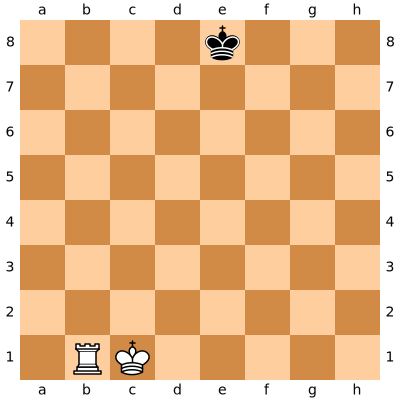

In [78]:
get_rook_start()

8/8/8/8/8/8/2K5/k1R5 b


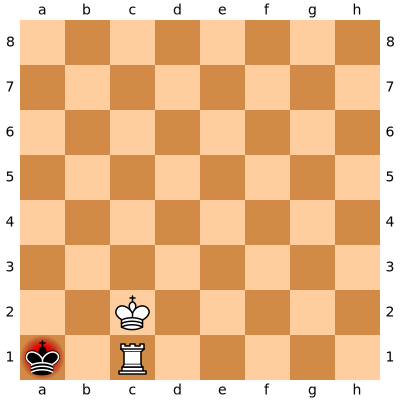

8/8/8/8/8/RK6/8/k7 b


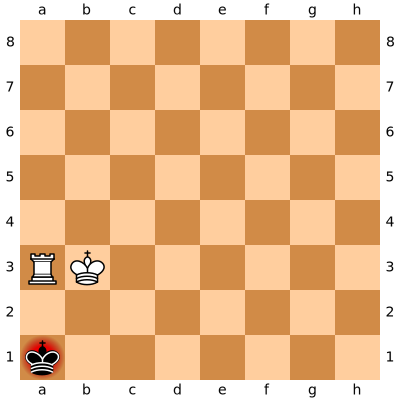

8/8/8/8/8/8/3K4/1k1R4 b


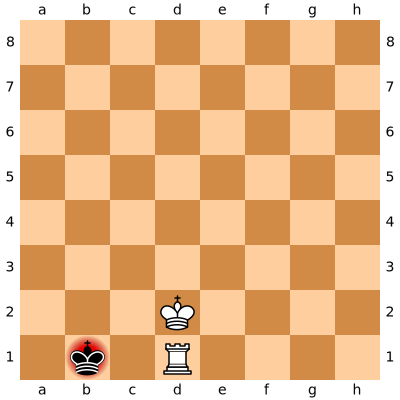

8/8/8/8/8/8/K7/R1k5 b


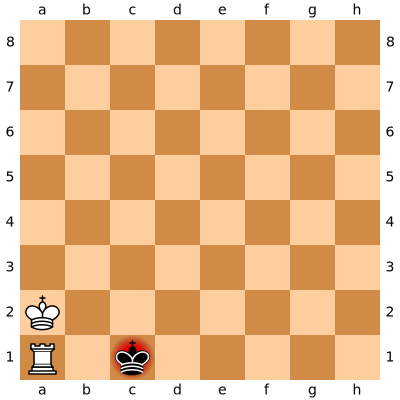

8/8/8/8/8/8/4K3/2k1R3 b


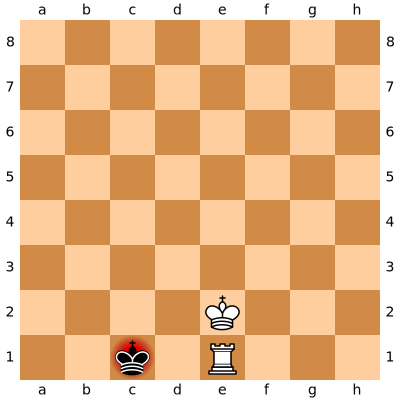

8/8/8/8/8/8/1K6/1R1k4 b


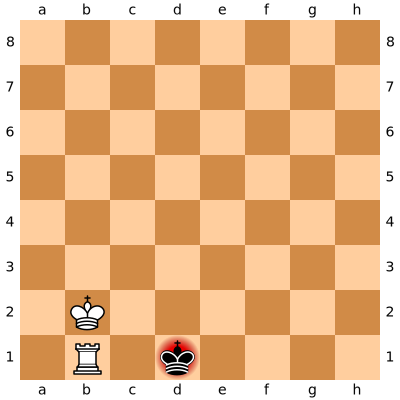

8/8/8/8/8/8/5K2/3k1R2 b


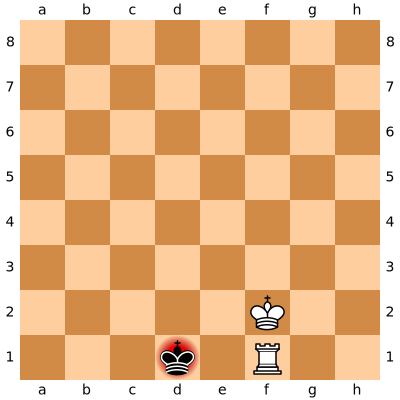

8/8/8/8/8/8/2K5/2R1k3 b


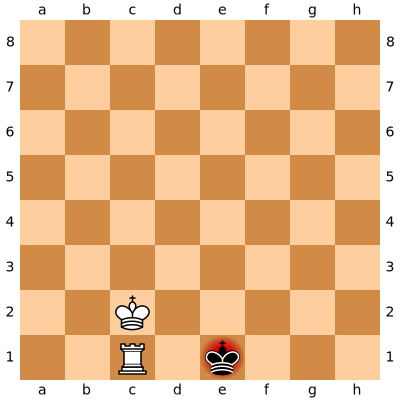

8/8/8/8/8/8/6K1/4k1R1 b


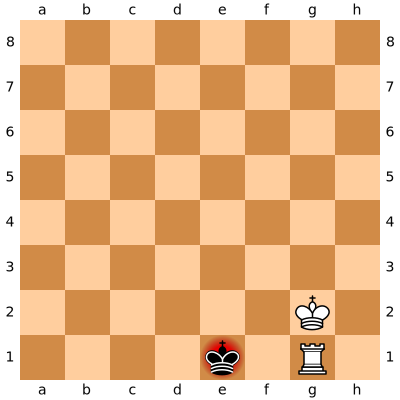

8/8/8/8/8/8/3K4/3R1k2 b


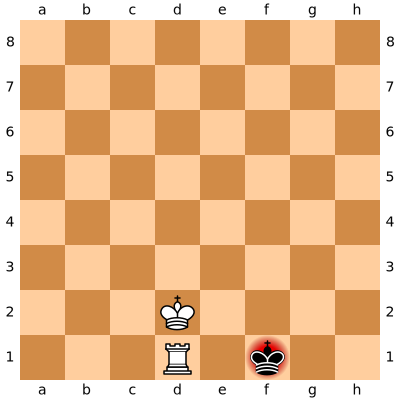

8/8/8/8/8/8/7K/5k1R b


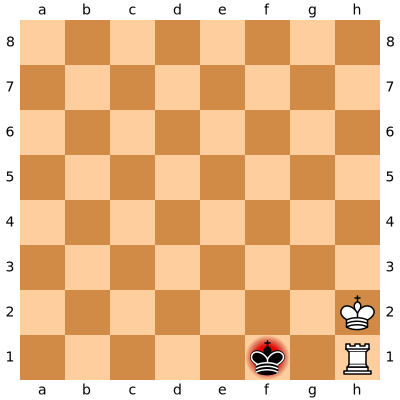

8/8/8/8/8/8/4K3/4R1k1 b


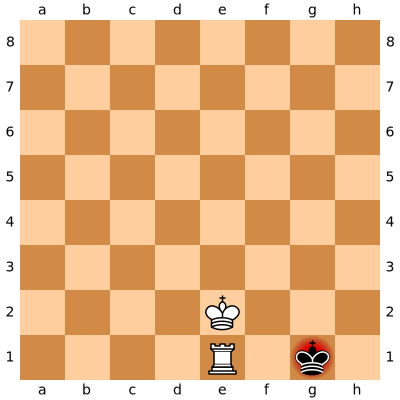

8/8/8/8/8/8/5K2/5R1k b


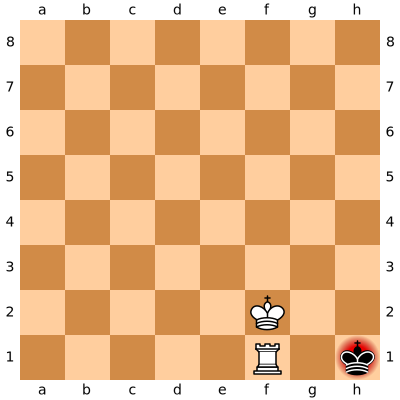

8/8/8/8/8/6KR/8/7k b


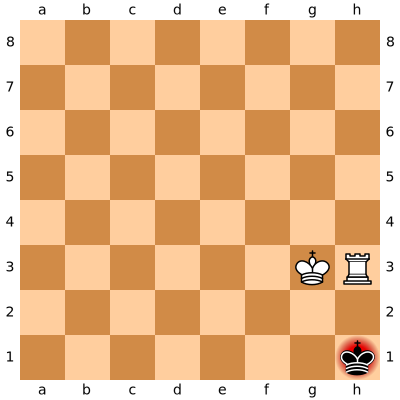

8/8/8/8/RK6/8/k7/8 b


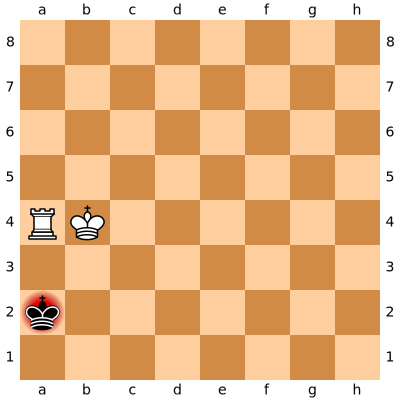

8/8/8/8/6KR/8/7k/8 b


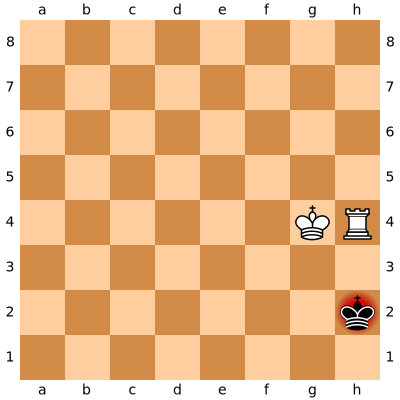

8/8/8/8/8/k7/8/RK6 b


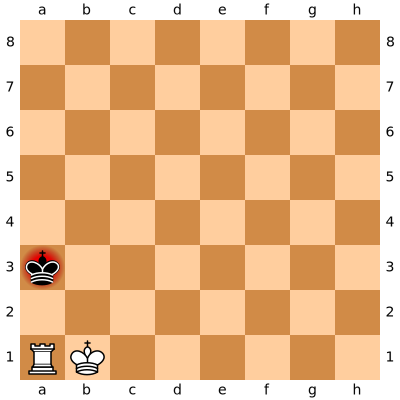

8/8/8/RK6/8/k7/8/8 b


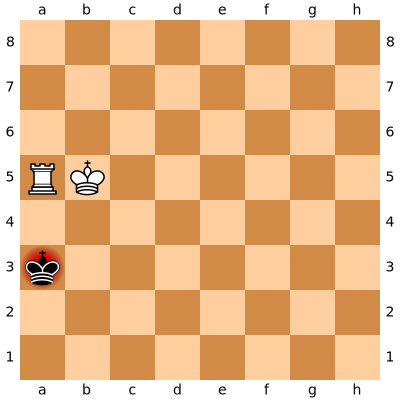

8/8/8/8/8/7k/8/6KR b


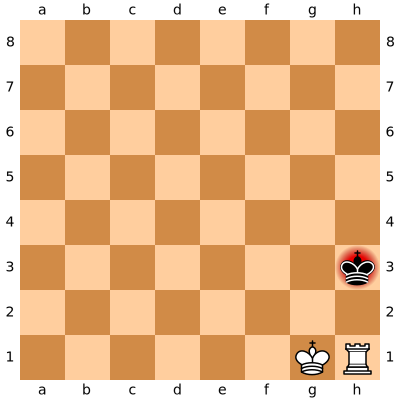

8/8/8/6KR/8/7k/8/8 b


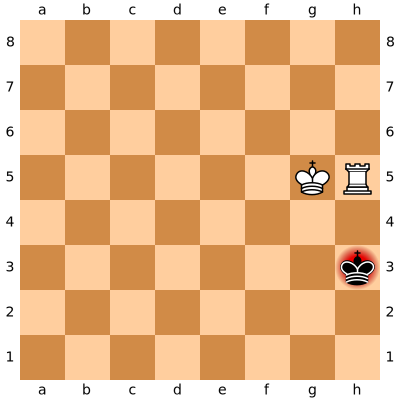

8/8/8/8/k7/8/RK6/8 b


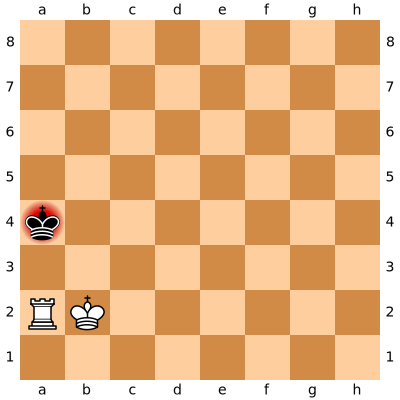

8/8/RK6/8/k7/8/8/8 b


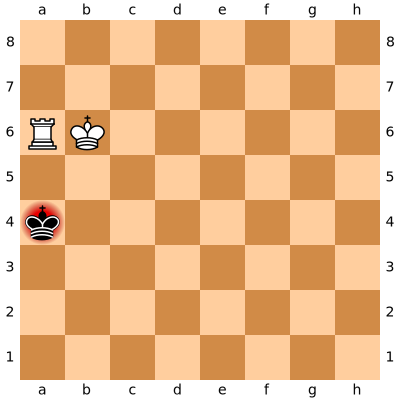

8/8/8/8/7k/8/6KR/8 b


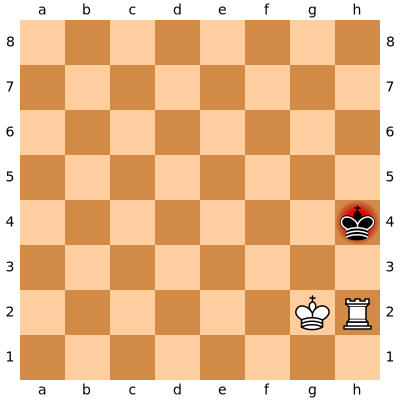

8/8/6KR/8/7k/8/8/8 b


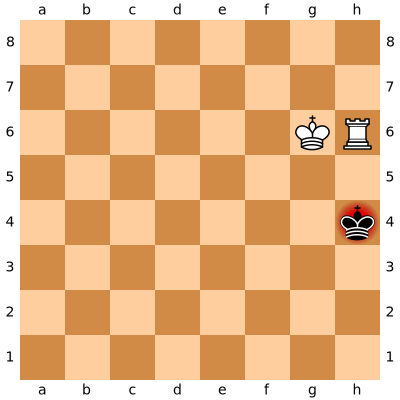

8/8/8/k7/8/RK6/8/8 b


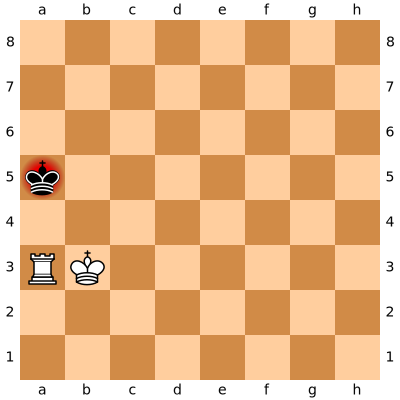

8/RK6/8/k7/8/8/8/8 b


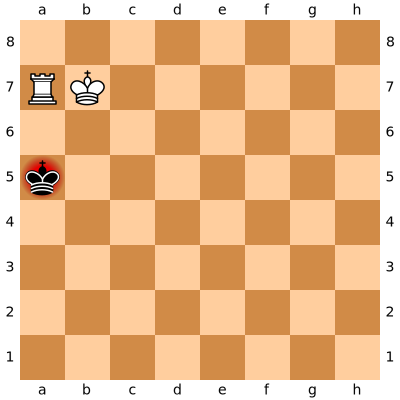

8/8/8/7k/8/6KR/8/8 b


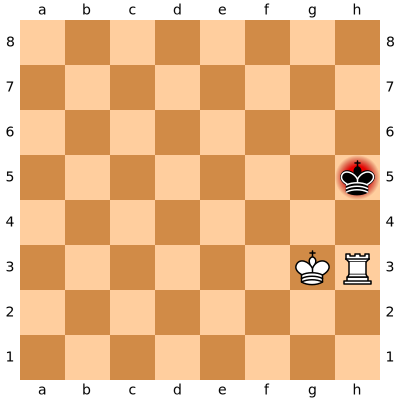

8/6KR/8/7k/8/8/8/8 b


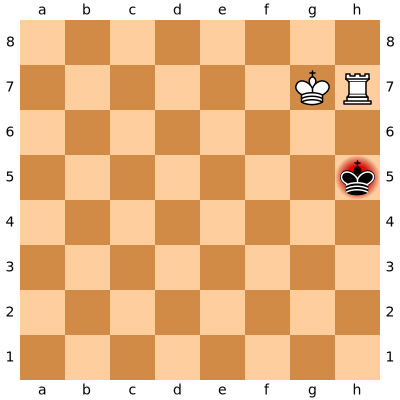

8/8/k7/8/RK6/8/8/8 b


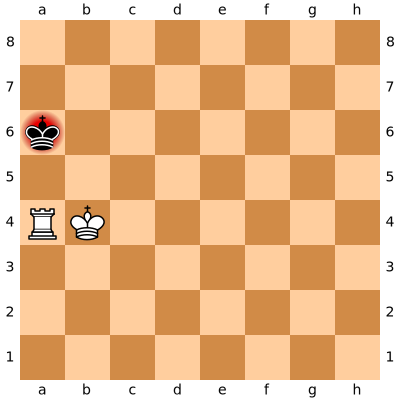

RK6/8/k7/8/8/8/8/8 b


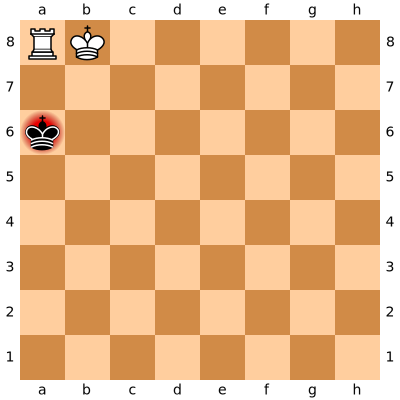

8/8/7k/8/6KR/8/8/8 b


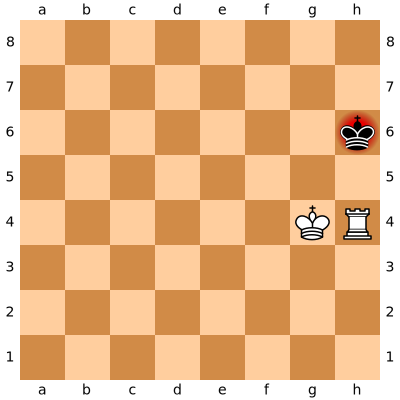

6KR/8/7k/8/8/8/8/8 b


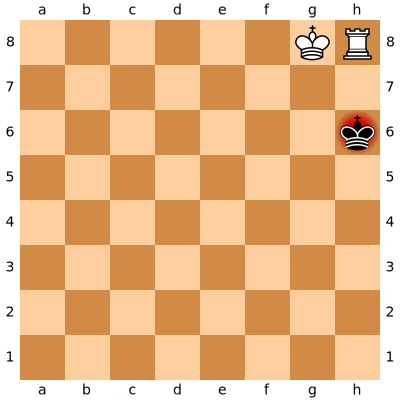

8/k7/8/RK6/8/8/8/8 b


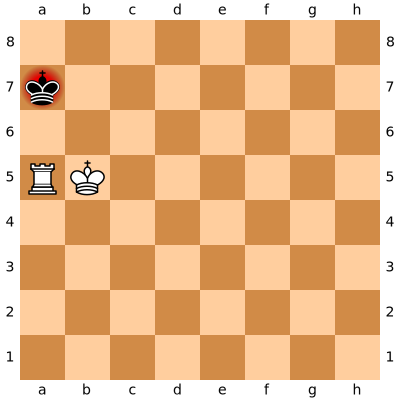

8/7k/8/6KR/8/8/8/8 b


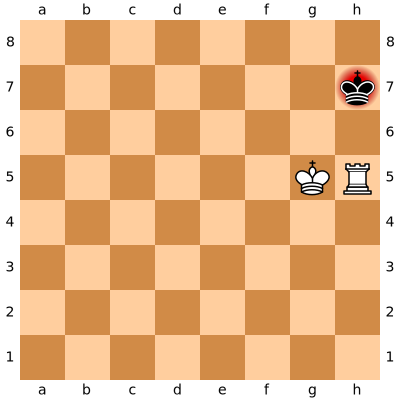

k7/8/RK6/8/8/8/8/8 b


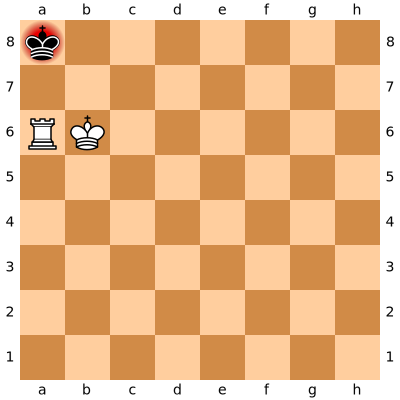

k1R5/2K5/8/8/8/8/8/8 b


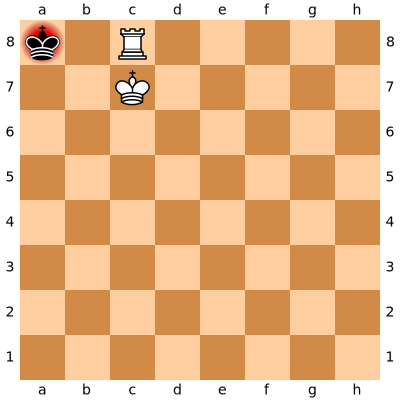

1k1R4/3K4/8/8/8/8/8/8 b


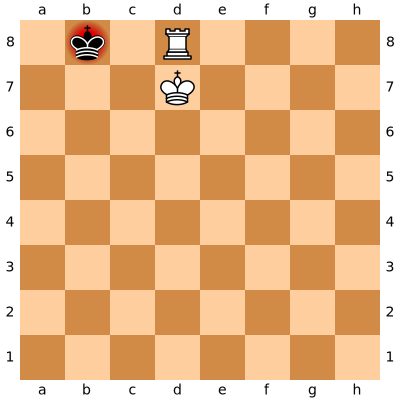

R1k5/K7/8/8/8/8/8/8 b


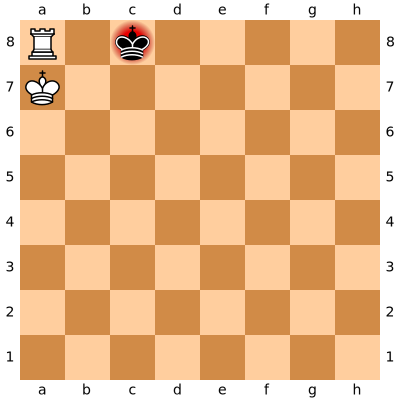

2k1R3/4K3/8/8/8/8/8/8 b


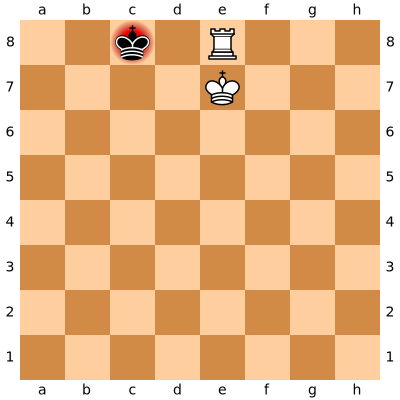

1R1k4/1K6/8/8/8/8/8/8 b


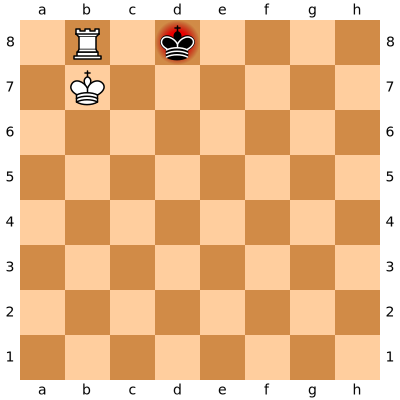

3k1R2/5K2/8/8/8/8/8/8 b


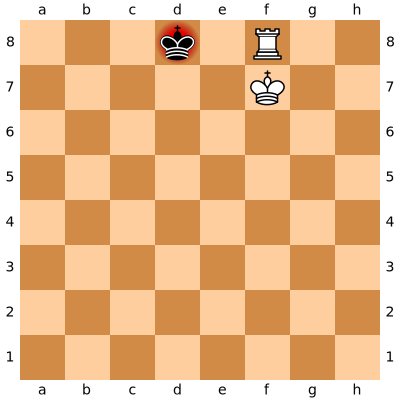

2R1k3/2K5/8/8/8/8/8/8 b


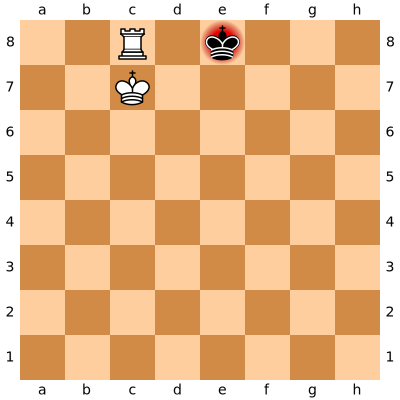

4k1R1/6K1/8/8/8/8/8/8 b


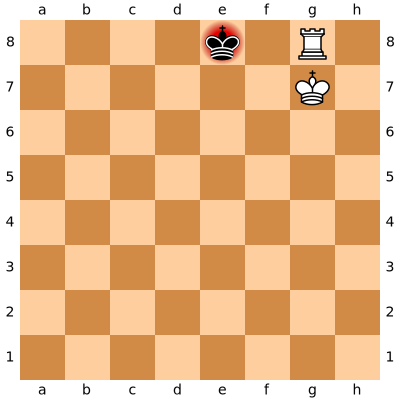

3R1k2/3K4/8/8/8/8/8/8 b


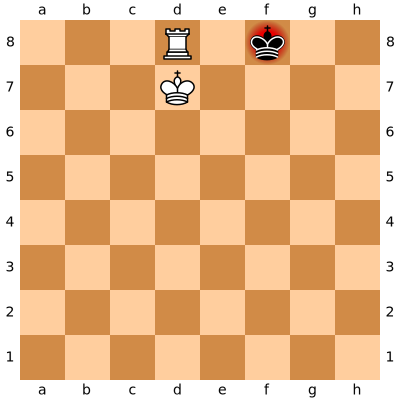

5k1R/7K/8/8/8/8/8/8 b


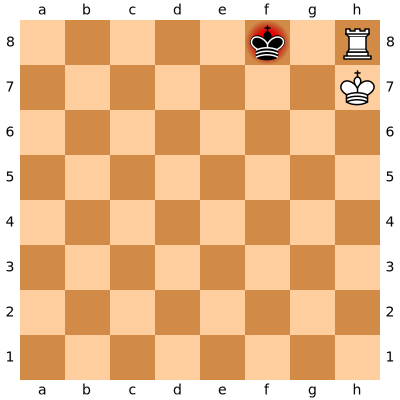

4R1k1/4K3/8/8/8/8/8/8 b


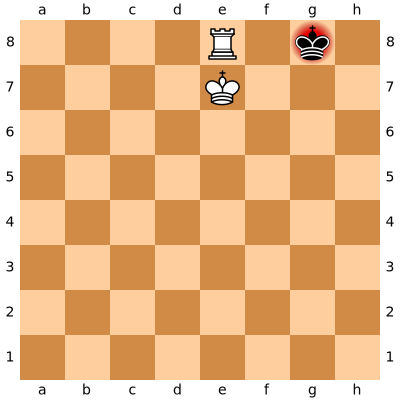

7k/8/6KR/8/8/8/8/8 b


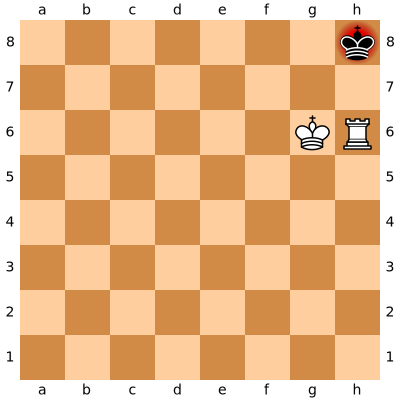

5R1k/5K2/8/8/8/8/8/8 b


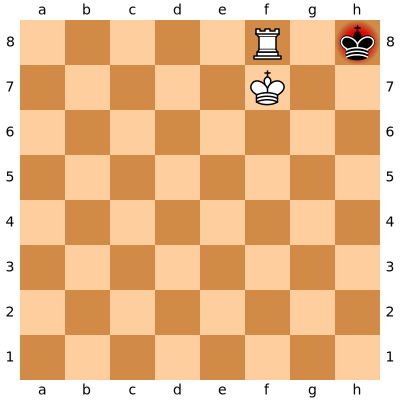

In [74]:
# There is no way to get into this positions starting from the above position
board = chess.Board()
for s in diff_states:
    board.set_fen(s + ' - - 0 1')
    print(s)
    display(board)

# Two Bishops

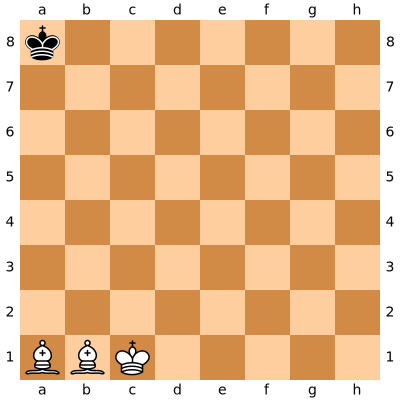

In [6]:
board = get_two_bishops_start()
board

In [7]:
# states: 5923016
# CPU times: user 1h 34min 54s, sys: 2min 33s, total: 1h 37min 27s
# Wall time: 1h 38min 6s
%time _ = bfs(board, './data/two_bishops_states_tree')

states: 5920000
CPU times: user 1h 33min 42s, sys: 2min 22s, total: 1h 36min 4s
Wall time: 1h 36min 33s


In [ ]:
states = shelve.open('./data/two_bishops_states_tree/states', flag='r')
print(len(states))

# Pawn Endgame

In [92]:
def get_pawn_start():
    board = chess.Board()
    board.clear()
    board.set_piece_at(12, chess.Piece(chess.PAWN, True))
    board.set_piece_at(4, chess.Piece(chess.KING, True))
    board.set_piece_at(60, chess.Piece(chess.KING, False))
    board.turn = True
    return board

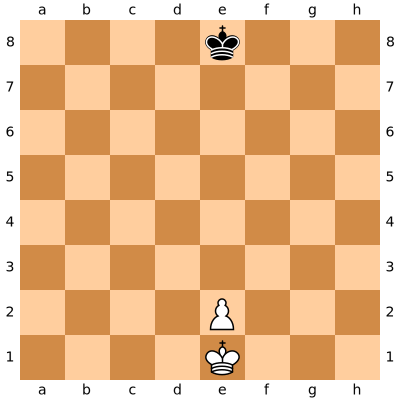

In [96]:
board = get_pawn_start()
board

In [97]:
# states: 807232
# CPU times: user 9min 40s, sys: 13.6 s, total: 9min 54s
# Wall time: 9min 56s
%time _ = bfs(board, './data/pawn_states_tree')

states: 800000
CPU times: user 9min 40s, sys: 13.6 s, total: 9min 54s
Wall time: 9min 56s


In [8]:
filename='./data/pawn_states_tree/states'
states = shelve.open(filename, flag='r')

In [9]:
len(states)

807232

In [103]:
states['4k3/8/4K2Q/8/8/8/8/8 w']

{'h6h8': {'status': -1, 'next_state': '4k2Q/8/4K3/8/8/8/8/8 b'},
 'h6f8': {'status': 0, 'next_state': '4kQ2/8/4K3/8/8/8/8/8 b'},
 'h6h7': {'status': 0, 'next_state': '4k3/7Q/4K3/8/8/8/8/8 b'},
 'h6g7': {'status': 0, 'next_state': '4k3/6Q1/4K3/8/8/8/8/8 b'},
 'h6g6': {'status': 0, 'next_state': '4k3/8/4K1Q1/8/8/8/8/8 b'},
 'h6f6': {'status': 0, 'next_state': '4k3/8/4KQ2/8/8/8/8/8 b'},
 'h6h5': {'status': 0, 'next_state': '4k3/8/4K3/7Q/8/8/8/8 b'},
 'h6g5': {'status': 0, 'next_state': '4k3/8/4K3/6Q1/8/8/8/8 b'},
 'h6h4': {'status': 0, 'next_state': '4k3/8/4K3/8/7Q/8/8/8 b'},
 'h6f4': {'status': 0, 'next_state': '4k3/8/4K3/8/5Q2/8/8/8 b'},
 'h6h3': {'status': 0, 'next_state': '4k3/8/4K3/8/8/7Q/8/8 b'},
 'h6e3': {'status': 0, 'next_state': '4k3/8/4K3/8/8/4Q3/8/8 b'},
 'h6h2': {'status': 0, 'next_state': '4k3/8/4K3/8/8/8/7Q/8 b'},
 'h6d2': {'status': 0, 'next_state': '4k3/8/4K3/8/8/8/3Q4/8 b'},
 'h6h1': {'status': 0, 'next_state': '4k3/8/4K3/8/8/8/8/7Q b'},
 'h6c1': {'status': 0, 'next_stat

In [105]:
states['4k3/8/4K2R/8/8/8/8/8 w']

{'h6h8': {'status': -1, 'next_state': '4k2R/8/4K3/8/8/8/8/8 b'},
 'h6h7': {'status': 0, 'next_state': '4k3/7R/4K3/8/8/8/8/8 b'},
 'h6g6': {'status': 0, 'next_state': '4k3/8/4K1R1/8/8/8/8/8 b'},
 'h6f6': {'status': 0, 'next_state': '4k3/8/4KR2/8/8/8/8/8 b'},
 'h6h5': {'status': 0, 'next_state': '4k3/8/4K3/7R/8/8/8/8 b'},
 'h6h4': {'status': 0, 'next_state': '4k3/8/4K3/8/7R/8/8/8 b'},
 'h6h3': {'status': 0, 'next_state': '4k3/8/4K3/8/8/7R/8/8 b'},
 'h6h2': {'status': 0, 'next_state': '4k3/8/4K3/8/8/8/7R/8 b'},
 'h6h1': {'status': 0, 'next_state': '4k3/8/4K3/8/8/8/8/7R b'},
 'e6f6': {'status': 0, 'next_state': '4k3/8/5K1R/8/8/8/8/8 b'},
 'e6d6': {'status': 0, 'next_state': '4k3/8/3K3R/8/8/8/8/8 b'},
 'e6f5': {'status': 0, 'next_state': '4k3/8/7R/5K2/8/8/8/8 b'},
 'e6e5': {'status': 0, 'next_state': '4k3/8/7R/4K3/8/8/8/8 b'},
 'e6d5': {'status': 0, 'next_state': '4k3/8/7R/3K4/8/8/8/8 b'}}